In [2]:
import pandas as pd

data = pd.read_csv("Crop and fertilizer dataset.csv")
data.drop(columns=["Link"], inplace=True)
data.head()
print(data.columns)

Index(['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium',
       'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer'],
      dtype='object')


# Splitting into X and Y

In [3]:
X_features = list(data.columns)
print(data.columns)
X_features.remove('Fertilizer')

# Apply one-hot encoding only to categorical columns
categorical_cols = ['District_Name', 'Soil_color', 'Crop']
numerical_cols = [col for col in X_features if col not in categorical_cols]

Index(['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium',
       'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer'],
      dtype='object')


In [4]:
data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)
#Combine with numerical  columms
X = pd.concat([data[numerical_cols], data_encoded], axis=1)

## TO encode Y into numerical values

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Fertilizer']= le.fit_transform(data['Fertilizer'])
Y = data['Fertilizer']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,  random_state=42)

model = RandomForestClassifier(class_weight='balanced', n_estimators=400, max_features=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for test data is: ", test_data_accuracy*100)

Accuracy for test data is:  94.2281879194631


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30,40, None],
    'max_features': ['sqrt', 0.3, 0.5, 0.7, 0.8]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = 3,  scoring = 'f1_weighted')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['sqrt', 0.3, 0.5, 0.7, 0.8],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1_weighted')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        48
           2       0.97      0.89      0.93        38
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00         3
           5       0.90      0.97      0.93       151
           6       1.00      1.00      1.00         4
           7       0.96      0.98      0.97        45
           8       1.00      1.00      1.00        13
           9       0.71      0.97      0.82        35
          10       0.95      0.91      0.93       223
          11       1.00      0.57      0.73        21
          12       1.00      1.00      1.00         6
          13       0.94      0.92      0.93       196
          14       0.90      0.99      0.94        77
          15       0.84      0.74      0.79       129
          16       1.00      1.00      1.00         3
          17       0.91    

## Drawing Confusion matrix

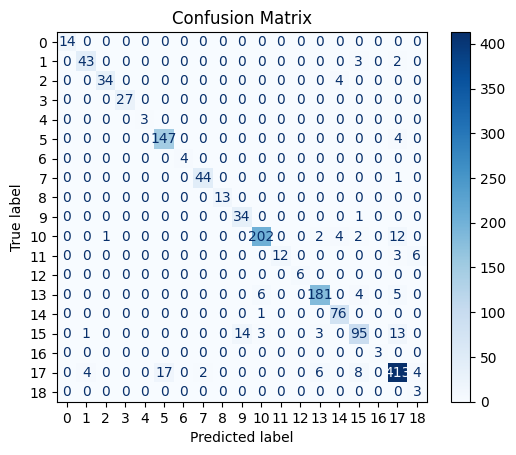

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()